In [106]:
#IMPORT DEPENDENCIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC #used for supervised machine learning
from sklearn.preprocessing import StandardScaler #to standardize dataset
from sklearn.model_selection import train_test_split #to divide data into training and testing sets

In [107]:
dataframe = pd.read_csv('../CSV-files/parkinsons.csv')
dataframe.describe()
dataframe = dataframe.drop(columns = ['name'], axis = 1)

In [108]:
Y = dataframe['status']
X = dataframe.drop(columns = ['status'], axis = 1)

In [109]:
correlation_matrix = X.corr(method = 'kendall').abs()
print(correlation_matrix)

                  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...        D2       PPE
MDVP:Fo(Hz)          1.000000      0.660270  ...  0.169442  0.302670
MDVP:Fhi(Hz)         0.660270      1.000000  ...  0.177372  0.172720
MDVP:Flo(Hz)         0.269469      0.123447  ...  0.085699  0.236373
MDVP:Jitter(%)       0.182092      0.065917  ...  0.254570  0.586272
MDVP:Jitter(Abs)     0.423228      0.260530  ...  0.165577  0.651185
MDVP:RAP             0.132984      0.042775  ...  0.260251  0.526431
MDVP:PPQ             0.203154      0.079536  ...  0.238715  0.621104
Jitter:DDP           0.132491      0.042788  ...  0.260380  0.526101
MDVP:Shimmer         0.103746      0.050022  ...  0.290088  0.485313
MDVP:Shimmer(dB)     0.103048      0.035267  ...  0.298870  0.487808
Shimmer:APQ3         0.091171      0.052989  ...  0.268965  0.447077
Shimmer:APQ5         0.083809      0.035586  ...  0.281673  0.475095
MDVP:APQ             0.147578      0.071648  ...  0.302824  0.532836
Shimmer:DDA          0.091106     

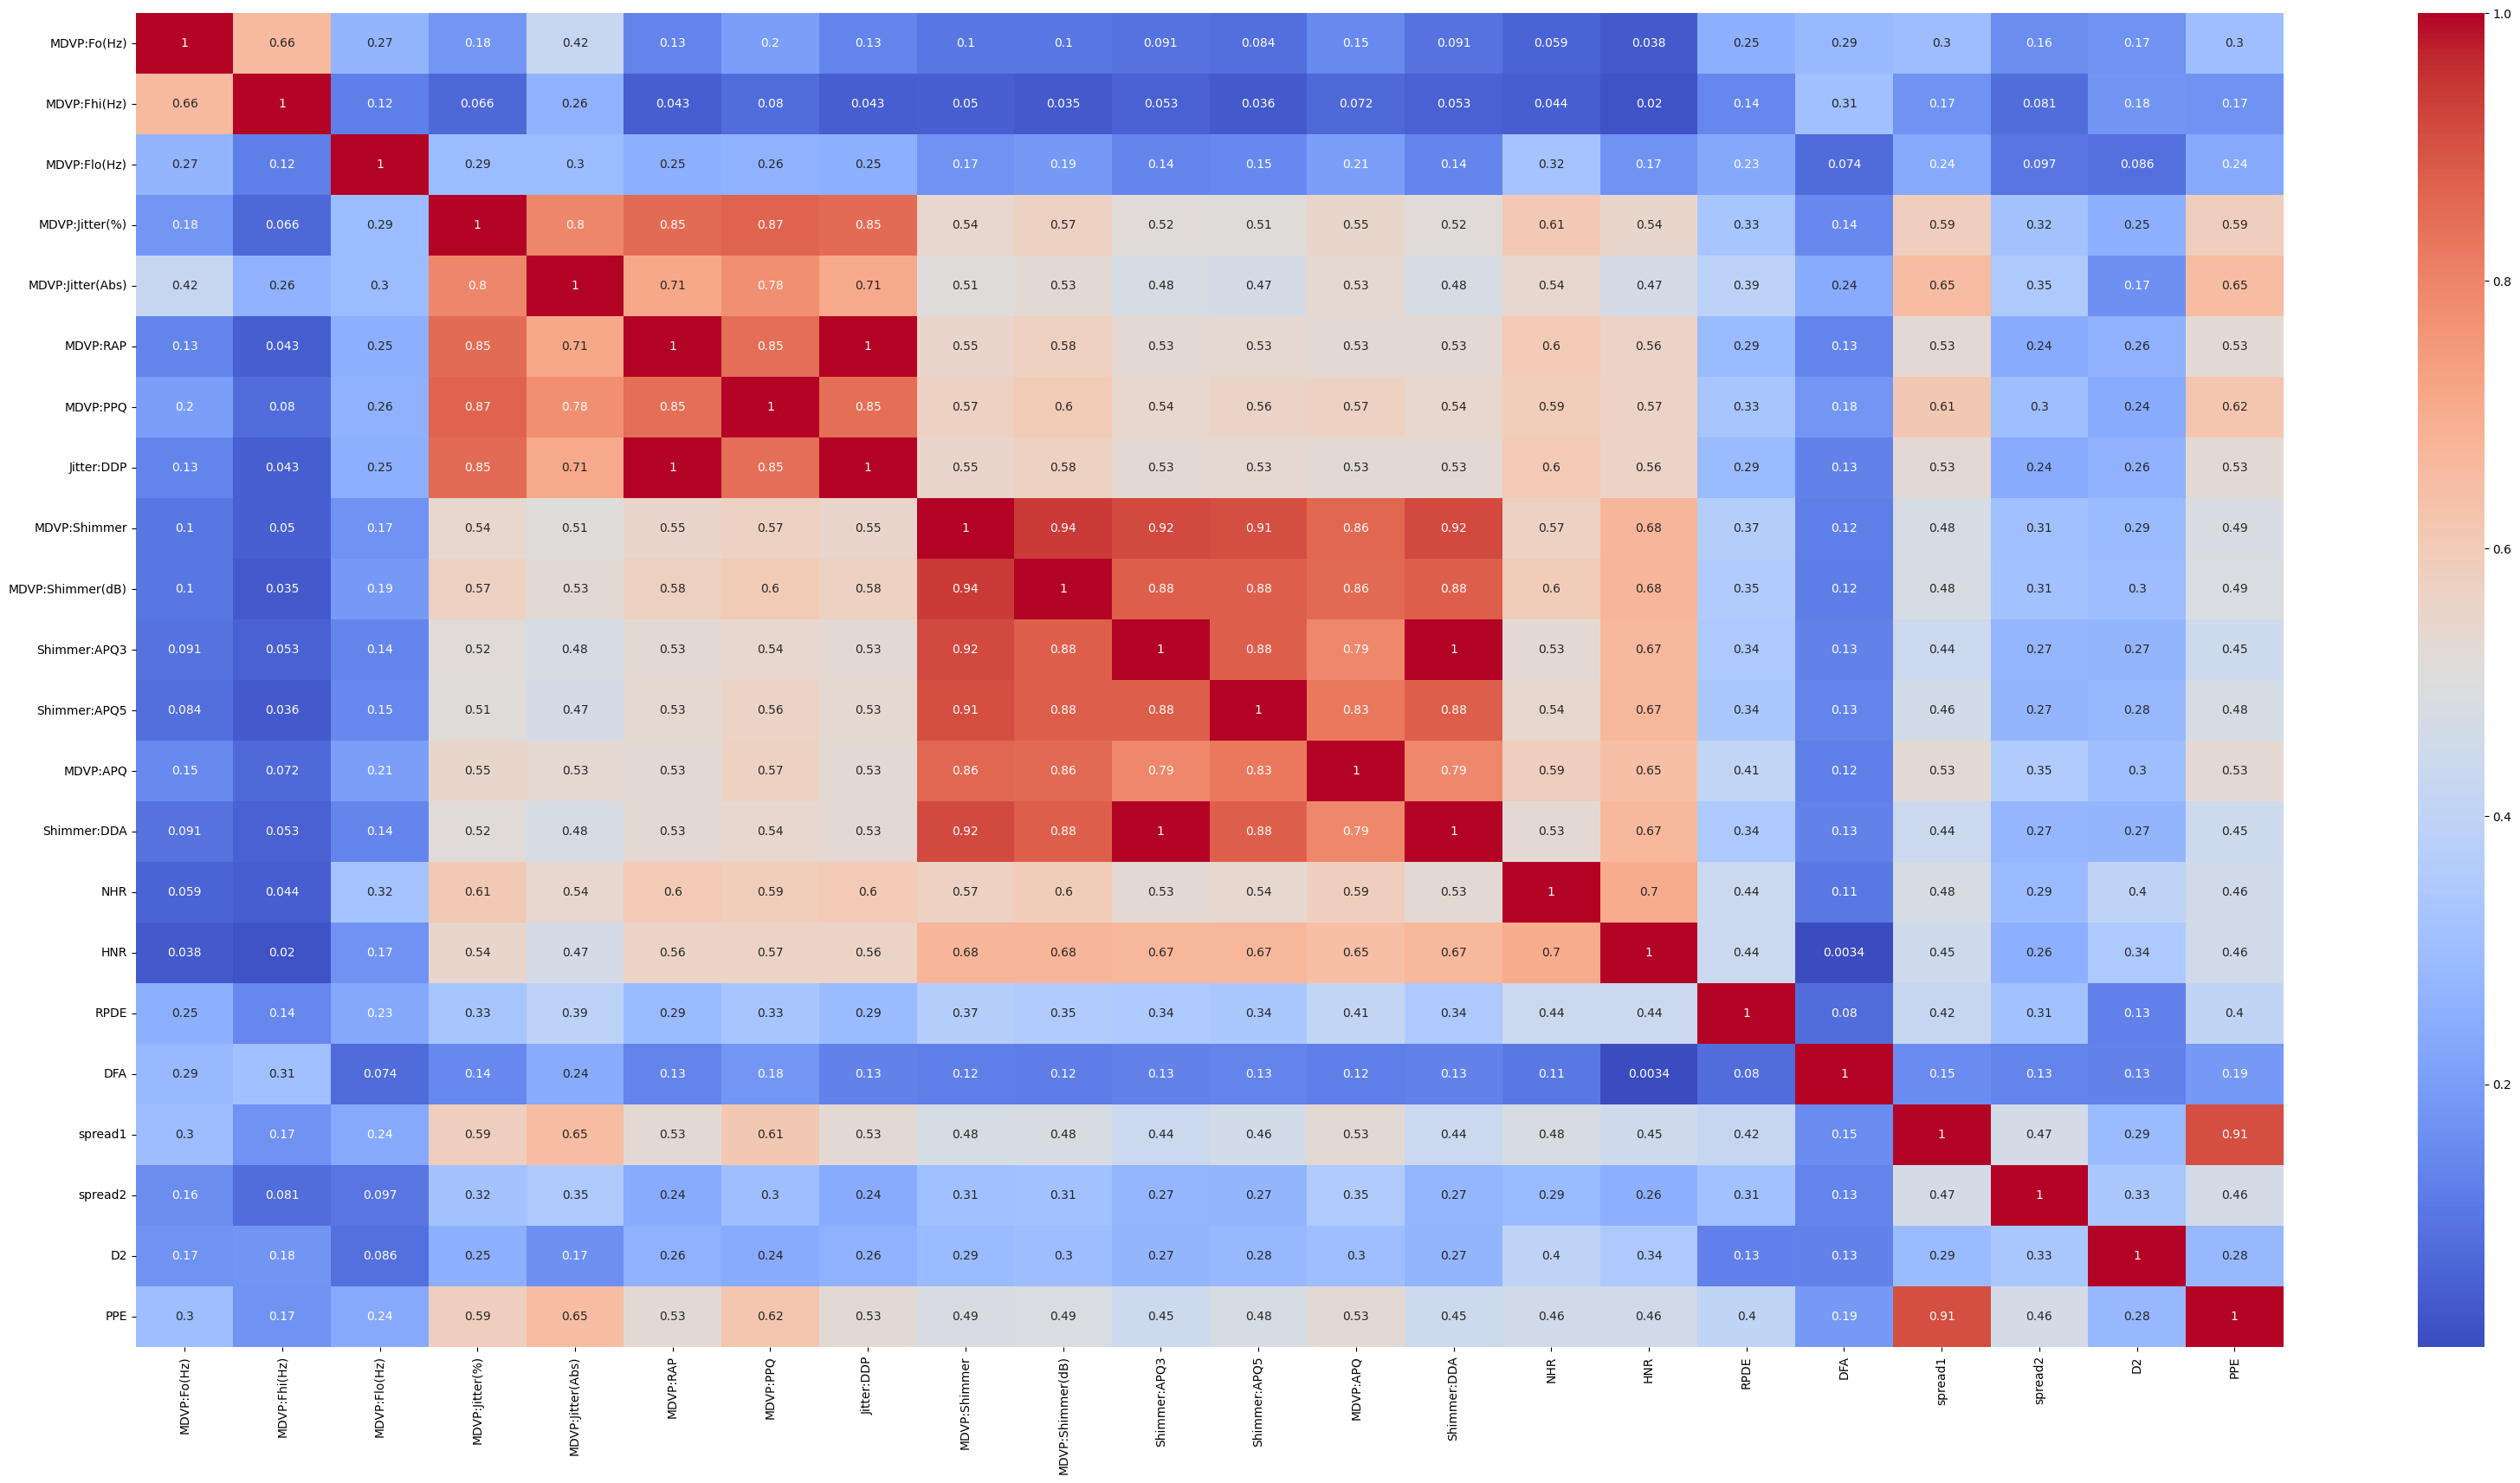

In [110]:
plt.figure(figsize=(40, 20))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [111]:
threshold = 0.89
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > (threshold))]
reduced_data = X.drop(columns=to_drop)
X = reduced_data

In [112]:
X.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,MDVP:Shimmer,MDVP:APQ,NHR,HNR,RPDE,DFA,spread1,spread2,D2
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.029709,0.024081,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.018857,0.016947,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.009540,0.007190,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.016505,0.013080,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.022970,0.018260,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.037885,0.029400,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.119080,0.137780,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155


In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y, random_state = 2)

In [114]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #test data is not fitted beacuse the model shouldn't see the test dataset

In [115]:
model = SVC(kernel = 'rbf', C=10.0, gamma='scale')
model.fit(X_train, Y_train)

SVC(C=10.0)

In [116]:
training_prediction = model.predict(X_train)
training_accuracy = accuracy_score(training_prediction, Y_train)
print("Accuracy on Training dataset: ", training_accuracy*100)

Accuracy on Training dataset:  98.63013698630137


In [117]:
testing_prediction = model.predict(X_test)
testing_accuracy = accuracy_score(testing_prediction, Y_test)
print("Accuracy on Testing dataset: ", testing_accuracy*100)

Accuracy on Testing dataset:  95.91836734693877


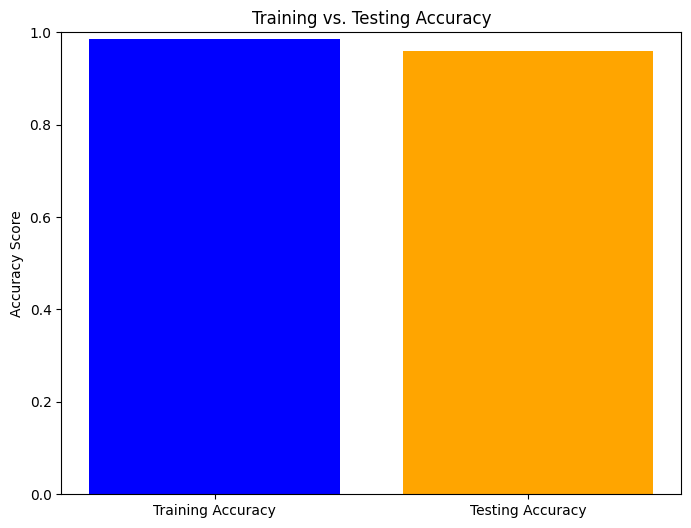

In [118]:
import matplotlib.pyplot as plt
accuracies = [training_accuracy, testing_accuracy]
labels = ['Training Accuracy', 'Testing Accuracy']

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)  # Accuracy range is from 0 to 1
plt.ylabel('Accuracy Score')
plt.title('Training vs. Testing Accuracy')
plt.show()

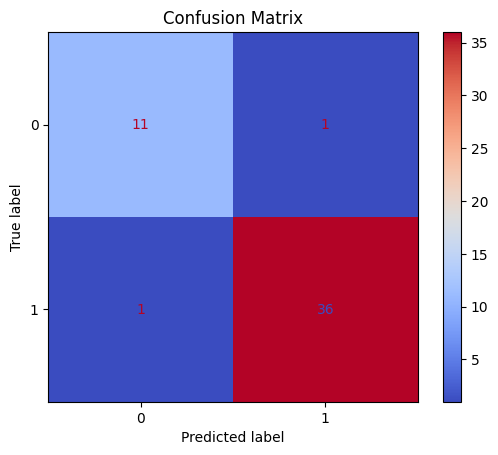

In [119]:
conf_matrix = confusion_matrix(Y_test, testing_prediction, labels=[0, 1])
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=[0, 1])
disp.plot(cmap='coolwarm')
plt.title('Confusion Matrix')
plt.show()

In [120]:
# #Building a predictive system
# input_array = (201.77400,262.70700,78.22800,0.00694,0.00003,0.00412,0.00396,0.01235,0.02574,0.25500,0.01454,0.01582,0.01758,0.04363,0.04441,19.36800,0.508479,0.683761,-6.934474,0.159890,2.316346,0.112838)
# numpy_array = np.asarray(input_array) 

# reshape_array = numpy_array.reshape(1, -1)

# standard_array = scaler.transform(reshape_array)

# prediction = model.predict(standard_array)

# if(prediction[0] == 0):
#     print("Person is healthy.")
# else:
#     print("Person has Parkinson's Disease")

In [121]:
import pickle

In [122]:
scaler_filename = 'parkinsons_scaler.pkl'
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Save the trained classifier (model) to a file
model_filename = 'parkinsons_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)